#Task 3: Linear Regression

##**Housing Price Prediction**

Objective: Implement and understand simple & multiple linear regression.

Tools: Scikit-learn, Pandas, Matplotlib


## Importing the Dependencies

In [171]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Importing the Dataset from the Kaggle

In [172]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("harishkumardatalab/housing-price-prediction")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/housing-price-prediction


In [173]:
df = pd.read_csv(path+'/Housing.csv')

In [174]:
#Checking the information about the dataset(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [175]:
#Checking the first 5 rows of the data
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [176]:
#Checking the descriptive stats
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [177]:
#Checking the null values in the data
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


There are no null rows or fields in the dataset

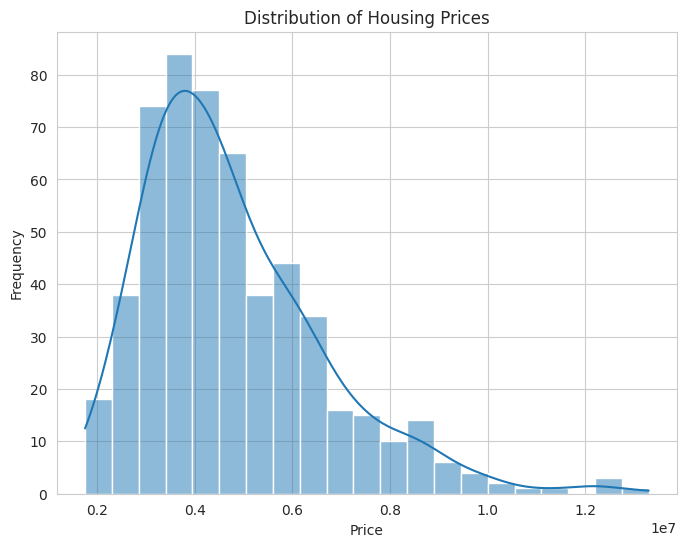

In [190]:
plt.figure(figsize=(8, 6))
sns.histplot(df['price'],kde = True)
plt.title('Distribution of Housing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Observation : ( Positively skewed ) The Houses with lower prices are more and the houses with the higher price are less

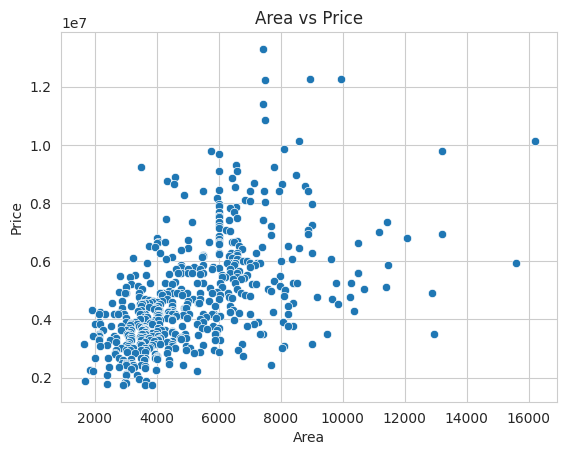

In [179]:
sns.scatterplot(x='area',y='price',data=df)
plt.title('Area vs Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

Observation:Positive trend means the area of a house increases, the price tends to increase as well.The points seem to be spread out, indicates the other factors also influence the price

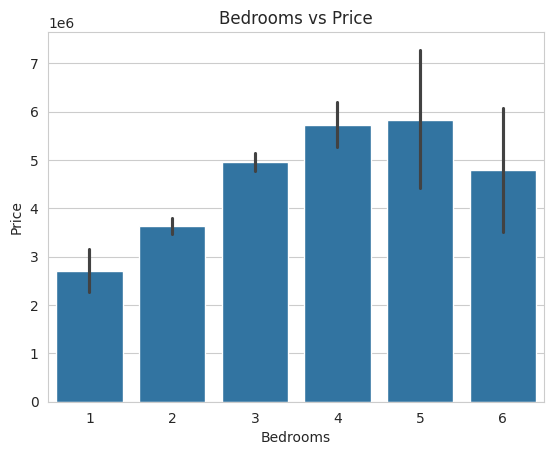

,count
bedrooms,
3,300
2,136
4,95
5,10
6,2
1,2


In [180]:
sns.barplot(x='bedrooms',y='price',data=df)
plt.title('Bedrooms vs Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()
df['bedrooms'].value_counts()

Obsservations:


* The trend of increasing price as the
number of the bedrooms increases from 1 to 5.
* Houses with 5 bedrooms appear to have the highest average price.
* Interestingly, the average price for the houses with 6 bedrooms seems to be lower than those with 5 bedrooms.It means other factors also influencing the prices.
* Variablity is high when the house has 5 bedrooms.



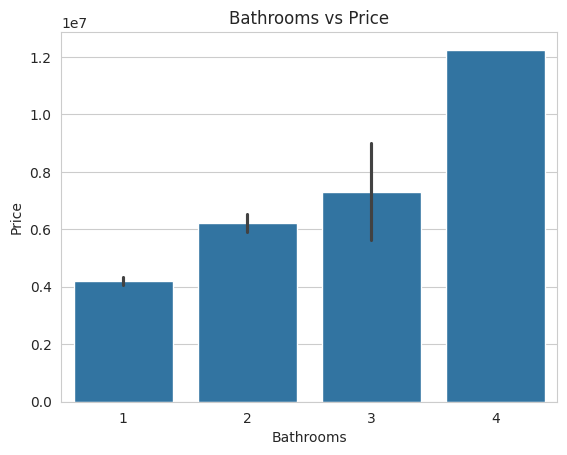

,count
bathrooms,
1,401
2,133
3,10
4,1


In [181]:
sns.barplot(x='bathrooms', y='price',data=df)
plt.title('Bathrooms vs Price')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.show()
df['bathrooms'].value_counts()

Observation: The trends of average prices increasing with respective to number of bathrooms

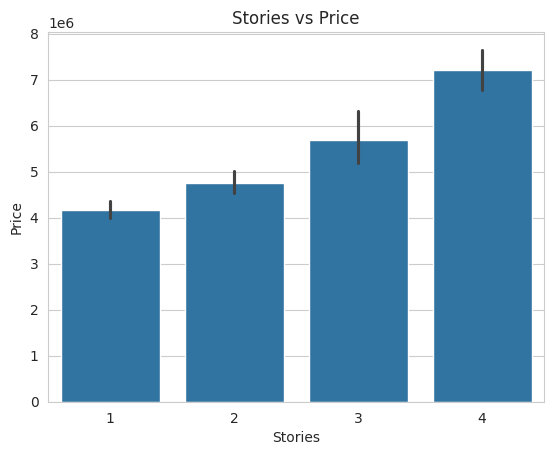

,count
stories,
2,238
1,227
4,41
3,39


In [182]:
sns.barplot(x='stories', y='price',data=df)
plt.title('Stories vs Price')
plt.xlabel('Stories')
plt.ylabel('Price')
plt.show()
df['stories'].value_counts()

Observation:The trends of price increasing as the stories(floors) increses.The highest average price for the houses those have 4 stories

In [183]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['mainroad'] = le.fit_transform(df['mainroad'])
df['guestroom'] = le.fit_transform(df['guestroom'])
df['basement'] = le.fit_transform(df['basement'])
df['hotwaterheating'] = le.fit_transform(df['hotwaterheating'])
df['airconditioning'] = le.fit_transform(df['airconditioning'])
df['parking'] = le.fit_transform(df['parking'])
df['prefarea'] = le.fit_transform(df['prefarea'])
df['furnishingstatus'] = le.fit_transform(df['furnishingstatus'])

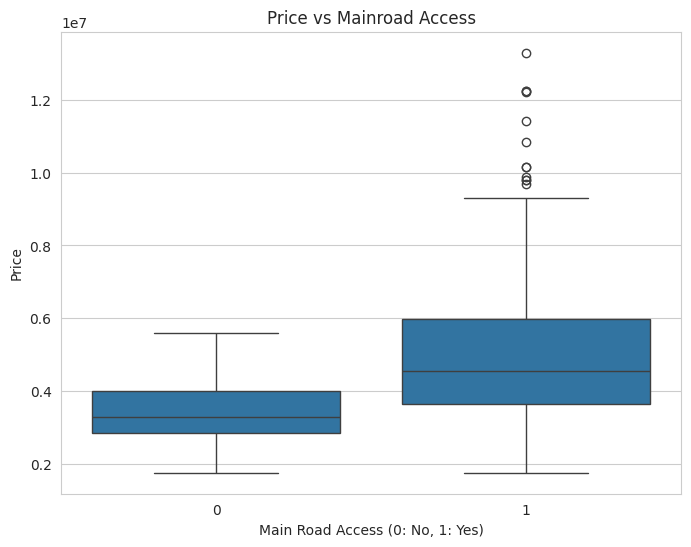

In [184]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='mainroad', y='price', data=df)
plt.title('Price vs Mainroad Access')
plt.xlabel('Main Road Access (0: No, 1: Yes)')
plt.ylabel('Price')
plt.show()

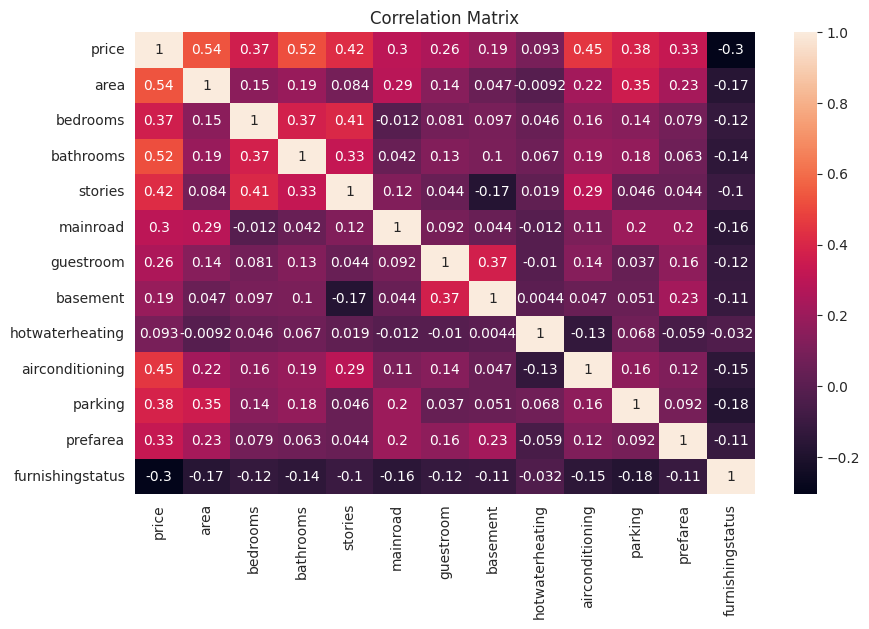

In [185]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix')
plt.show()


In [186]:
X = df.drop('price',axis=1)
y = df['price']
y = np.log1p(df['price'])

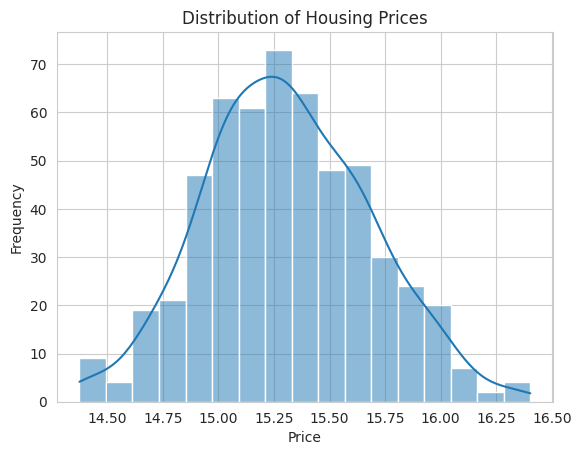

In [191]:
sns.histplot(y,kde=True)
plt.title('Distribution of Housing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [187]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [188]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [195]:
y_pred_log = model.predict(x_test)

y_pred_actual = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_test)

In [198]:
#Calculate metrics using normal values
print("Mean Squared Error:", mean_squared_error(y_test_actual, y_pred_actual))
print("R-squared Score:", r2_score(y_test_actual, y_pred_actual))

Mean Squared Error: 1769035996319.8337
R-squared Score: 0.6500125806751067


In [194]:
# Calculate metrics using log-transformed values
print("Mean Squared Error (log-transformed):", mean_squared_error(y_test, y_pred_log))
print("R-squared Score (log-transformed):", r2_score(y_test, y_pred_log))

Mean Squared Error (log-transformed): 0.0664352945263489
R-squared Score (log-transformed): 0.6559336987837994
